### Case Study on Formula 1 Racing Analysis

##### High Level Description: 

The below notebook is in Python code used to perform data wrangling and Exploratory Analysis of Formula One racing. The data gathered from an API and required transformation to make it usable for analysis. The notebook walks through file loads, transformation, data correction and update that needed to be completed. Highlights skillsets like data ingestion, data transformation, data combining/grouping (using SQLite via Python) along with data correction and update all using Python. 

The analysis was performed on better understanding the data from a driver, circuit (race course) and region analysis to better understand what features influence drivers and contractors winning racing in the most highly competitive and highest class of open wheel racing in the world. 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlite3 import Error

In [24]:
#Load csv files that were moved from dataframes to csv
df_drivers_ms2=pd.read_csv('ms_2_df_drivers_updt.csv',encoding= 'unicode_escape')
df_pitstops_ms2=pd.read_csv('ms_2_df_pitstops_updt.csv',encoding= 'unicode_escape')
df_circuits_ms3=pd.read_csv('ms3_circuits_final.csv', encoding= 'unicode_escape')
df_results_ms4=pd.read_csv('ms_4_df_results_final.csv',encoding= 'unicode_escape')


Review data by pulling top 5 rows.

In [3]:
#Check df before starting tables build
#Table 1
df_drivers_ms2.head(5)

,driver_id,driver_ref,code,first_nm,last_nm,dob,driver_nationality
0,1,hamilton,HAM,Lewis,Hamilton,1/7/1985,British
1,2,heidfeld,HEI,Nick,Heidfeld,5/10/1977,German
2,3,rosberg,ROS,Nico,Rosberg,6/27/1985,German
3,4,alonso,ALO,Fernando,Alonso,7/29/1981,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,10/19/1981,Finnish


In [4]:
#Table 2-
df_pitstops_ms2.head(5)

,race_id,driver_id,num_of_pit_stops,lap_num,time_24h,stop_duration,duration_milli_sec
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [5]:
#Table 3
df_circuits_ms3.head(5)

,circuit_id,circuit_ref,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,25,galvez,Autodromo de Buenos Aires Oscar y Juan Galvez,Race circuit,Clockwise,Buenos Aires,Argentina,2.646 mi,4.259 km,Argentine Grand Prix,20,"1953 1958, 1960, 1972 1975, 1977 1981, 1995 1998"
1,29,adelaide,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11,1985 1995
2,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24,1996 2019
3,70,red_bull_ring,Red Bull Ring,Race circuit,Clockwise,Spielburg,Austria,2.683 mi,4.318 km,"Austrian Grand Prix,Styrian Grand Prix",33,"1970 1987, 1997 2003, 2014 2020[a]"
4,57,zeltweg,Zeltweg Airfield,Road circuit,Clockwise,Zeltweg,Austria,1.980 mi,3.186 km,Austrian Grand Prix,1,1964


In [25]:
#Table 4
df_results_ms4.head(5)

,season,round,circuit_ref,driver_ref,constructor,starting_position,time_in_min,status,points_earned,finishing_position,circuit_id
0,1950,1,silverstone,farina,alfa,1,133.393333,Finished,9.0,1,9
1,1950,1,silverstone,fagioli,alfa,2,133.436667,Finished,6.0,2,9
2,1950,1,silverstone,reg_parnell,alfa,4,134.260000,Finished,4.0,3,9
3,1950,1,silverstone,cabantous,lago,6,NaN,+2 Laps,3.0,4,9
4,1950,1,silverstone,rosier,lago,9,NaN,+2 Laps,2.0,5,9


In [7]:
#Check column names
df_drivers_ms2.columns

Index(['driver_id', 'driver_ref', 'code', 'first_nm', 'last_nm', 'dob',
       'driver_nationality'],
      dtype='object')

In [8]:
#Rename column code to driver_code so it makes sense
df_drivers_ms2 = df_drivers_ms2.rename(columns={'code':'driver_code'})

In [9]:
#Check changes to df_driver_id for update of driver_code field
df_drivers_ms2.columns

Index(['driver_id', 'driver_ref', 'driver_code', 'first_nm', 'last_nm', 'dob',
       'driver_nationality'],
      dtype='object')

In [10]:
#Create my db
conn = sqlite3.connect('db_formula_one.db') #Connection/Create db_formula_one.db
conn.close() #Close connection once complete

In [11]:
#Create table tbl_drivers_ms2
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    c = conn.cursor()
    df_drivers_ms2.to_sql('df_drivers_ms2', conn) #Send data frame to SQL for table creation
    c.execute('''CREATE TABLE tbl_drivers_ms2 AS SELECT * FROM df_drivers_ms2''') #SQL Code to create table
    conn.commit()

In [12]:
#Confrom table tbl_drivers_ms2 is in db
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    query_test = '''SELECT * FROM tbl_drivers_ms2''' #SQL for checking table
    df_test = pd.read_sql(query_test,conn) #Send SQL to DB
    print(df_test.head()) #Read what comes back

   index  driver_id  driver_ref driver_code  first_nm     last_nm         dob  \
0      0          1    hamilton         HAM     Lewis    Hamilton    1/7/1985   
1      1          2    heidfeld         HEI      Nick    Heidfeld   5/10/1977   
2      2          3     rosberg         ROS      Nico     Rosberg   6/27/1985   
3      3          4      alonso         ALO  Fernando      Alonso   7/29/1981   
4      4          5  kovalainen         KOV    Heikki  Kovalainen  10/19/1981   

  driver_nationality  
0            British  
1             German  
2             German  
3            Spanish  
4            Finnish  


In [13]:
#Create table tbl_pitstops_ms2
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    c = conn.cursor()
    df_pitstops_ms2.to_sql('df_pitstops_ms2', conn) #Send data frame to SQL for table creation
    c.execute('''CREATE TABLE tbl_pitstops_ms2 AS SELECT * FROM df_pitstops_ms2''') #SQL Code to create table
    conn.commit()

In [14]:
#Confrom table tbl_pitstops_ms2 is in db
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    query_test = '''SELECT * FROM tbl_pitstops_ms2''' #SQL for checking table
    df_test = pd.read_sql(query_test,conn) #Send SQL to DB
    print(df_test.head()) #Read what comes back

   index  race_id  driver_id  num_of_pit_stops  lap_num  time_24h  \
0      0      841        153                 1        1  17:05:23   
1      1      841         30                 1        1  17:05:52   
2      2      841         17                 1       11  17:20:48   
3      3      841          4                 1       12  17:22:34   
4      4      841         13                 1       13  17:24:10   

   stop_duration  duration_milli_sec  
0         26.898               26898  
1         25.021               25021  
2         23.426               23426  
3         23.251               23251  
4         23.842               23842  


In [15]:
#Create table tbl_circuits_ms3
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    c = conn.cursor()
    df_circuits_ms3.to_sql('df_circuits_ms3', conn) #Send data frame to SQL for table creation
    c.execute('''CREATE TABLE tbl_cirtuits_ms3 AS SELECT * FROM df_circuits_ms3''') #SQL Code to create table
    conn.commit()

In [16]:
#Confrom table tbl_circtuis_ms3 is in db
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    query_test = '''SELECT * FROM tbl_cirtuits_ms3''' #SQL for checking table
    df_test = pd.read_sql(query_test,conn) #Send SQL to DB
    print(df_test.head()) #Read what comes back

   index  circuit_id    circuit_ref  \
0      0          25         galvez   
1      1          29       adelaide   
2      2           1    albert_park   
3      3          70  red_bull_ring   
4      4          57        zeltweg   

                                      circuit_nm    circuit_type  \
0  Autodromo de Buenos Aires Oscar y Juan Galvez    Race circuit   
1                        Adelaide Street Circuit  Street circuit   
2                            Albert Park Circuit  Street circuit   
3                                  Red Bull Ring    Race circuit   
4                               Zeltweg Airfield    Road circuit   

  race_direction  circuit_city circuit_country circuit_length_miles  \
0      Clockwise  Buenos Aires       Argentina             2.646 mi   
1      Clockwise      Adelaide       Australia             2.349 mi   
2      Clockwise     Melbourne       Australia             3.295 mi   
3      Clockwise     Spielburg         Austria             2.683 mi   
4

In [27]:
#Create table tbl_results_ms4
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    c = conn.cursor()
    df_results_ms4.to_sql('df_results_ms4', conn) #Send data frame to SQL for table creation
    c.execute('''CREATE TABLE tbl_results_ms4 AS SELECT * FROM df_results_ms4''') #SQL Code to create table
    conn.commit()

In [28]:
#Confrom table tbl_results_ms4 is in db
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    query_test = '''SELECT * FROM tbl_results_ms4''' #SQL for checking table
    df_test = pd.read_sql(query_test,conn) #Send SQL to DB
    print(df_test.head()) #Read what comes back

   index  season  round  circuit_ref   driver_ref constructor  \
0      0    1950      1  silverstone       farina        alfa   
1      1    1950      1  silverstone      fagioli        alfa   
2      2    1950      1  silverstone  reg_parnell        alfa   
3      3    1950      1  silverstone    cabantous        lago   
4      4    1950      1  silverstone       rosier        lago   

   starting_position  time_in_min    status  points_earned  \
0                  1   133.393333  Finished            9.0   
1                  2   133.436667  Finished            6.0   
2                  4   134.260000  Finished            4.0   
3                  6          NaN   +2 Laps            3.0   
4                  9          NaN   +2 Laps            2.0   

   finishing_position  circuit_id  
0                   1           9  
1                   2           9  
2                   3           9  
3                   4           9  
4                   5           9  


In [19]:
#Combine the tables in SQL DB using JOIN
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    c = conn.cursor()
    rows = c.execute('''SELECT * FROM tbl_results_ms4 trm4 \
    LEFT JOIN tbl_cirtuits_ms3 tcm3 ON trm4.circuit_id = tcm3.circuit_id \
    ''')
    for row in rows:
        print(row)

(0, 25, 'galvez', 'Autodromo de Buenos Aires Oscar y Juan Galvez', 'Race circuit', 'Clockwise', 'Buenos Aires', 'Argentina', '2.646\xa0mi', '4.259\xa0km ', 'Argentine Grand Prix', 20, '1953 1958, 1960, 1972 1975, 1977 1981, 1995 1998', 0, 25, 'galvez', 'Autodromo de Buenos Aires Oscar y Juan Galvez', 'Race circuit', 'Clockwise', 'Buenos Aires', 'Argentina', '2.646\xa0mi', '4.259\xa0km ', 'Argentine Grand Prix', 20, '1953 1958, 1960, 1972 1975, 1977 1981, 1995 1998')
(1, 29, 'adelaide', 'Adelaide Street Circuit', 'Street circuit', 'Clockwise', 'Adelaide', 'Australia', '2.349\xa0mi', '3.780\xa0km ', 'Australian Grand Prix', 11, '1985 1995', 1, 29, 'adelaide', 'Adelaide Street Circuit', 'Street circuit', 'Clockwise', 'Adelaide', 'Australia', '2.349\xa0mi', '3.780\xa0km ', 'Australian Grand Prix', 11, '1985 1995')
(2, 1, 'albert_park', 'Albert Park Circuit', 'Street circuit', 'Clockwise', 'Melbourne', 'Australia', '3.295\xa0mi', '5.303\xa0km ', 'Australian Grand Prix', 24, '1996 2019', 2, 

In [2]:
#Create my join table for database
with sqlite3.connect('db_formula_one.db') as conn: #Connect to db
    c = conn.cursor()
    #Query for joinin all my tables
    query = '''SELECT * FROM tbl_cirtuits_ms3 tcm3 \
    LEFT JOIN tbl_results_ms4 trm4 ON trm4.circuit_id = tcm3.circuit_id \
    LEFT JOIN tbl_drivers_ms2 tdm2 ON trm4.driver_ref = tdm2.driver_ref'''
    df_milestone5=pd.read_sql(query,con=conn) #Export the merged data into a dataframe
    df_milestone5.T.drop_duplicates().T #Remove duplicates from the tables
    print(df_milestone5.head())
    

  index  circuit_id circuit_ref  \
0     0          25      galvez   
1     0          25      galvez   
2     0          25      galvez   
3     0          25      galvez   
4     0          25      galvez   

                                      circuit_nm  circuit_type race_direction  \
0  Autodromo de Buenos Aires Oscar y Juan Galvez  Race circuit      Clockwise   
1  Autodromo de Buenos Aires Oscar y Juan Galvez  Race circuit      Clockwise   
2  Autodromo de Buenos Aires Oscar y Juan Galvez  Race circuit      Clockwise   
3  Autodromo de Buenos Aires Oscar y Juan Galvez  Race circuit      Clockwise   
4  Autodromo de Buenos Aires Oscar y Juan Galvez  Race circuit      Clockwise   

   circuit_city circuit_country circuit_length_miles circuit_length_km  ...  \
0  Buenos Aires       Argentina             2.646 mi         4.259 km   ...   
1  Buenos Aires       Argentina             2.646 mi         4.259 km   ...   
2  Buenos Aires       Argentina             2.646 mi         4.25

In [61]:
#Checking if the joing are working and returned all needed rows
db_formula_one.shape


(24507, 33)

In [62]:
#Check the column names
db_formula_one.columns

Index(['index', 'circuit_id', 'circuit_ref', 'circuit_nm', 'circuit_type',
       'race_direction', 'circuit_city', 'circuit_country',
       'circuit_length_miles', 'circuit_length_km', 'race_nm', 'races_held',
       'season_utilize', 'index', 'season', 'round', 'circuit_ref',
       'driver_ref', 'constructor', 'starting_position', 'time_in_min',
       'status', 'points_earned', 'finishing_position', 'circuit_id', 'index',
       'driver_id', 'driver_ref', 'driver_code', 'first_nm', 'last_nm', 'dob',
       'driver_nationality'],
      dtype='object')

In [5]:
#Remove warning msg
import warnings
warnings.filterwarnings('ignore')

In [63]:
#Check the data types
db_formula_one.dtypes

index                     int64
circuit_id                int64
circuit_ref              object
circuit_nm               object
circuit_type             object
race_direction           object
circuit_city             object
circuit_country          object
circuit_length_miles     object
circuit_length_km        object
race_nm                  object
races_held                int64
season_utilize           object
index                     int64
season                    int64
round                     int64
circuit_ref              object
driver_ref               object
constructor              object
starting_position         int64
time_in_min             float64
status                   object
points_earned           float64
finishing_position        int64
circuit_id                int64
index                   float64
driver_id               float64
driver_ref               object
driver_code              object
first_nm                 object
last_nm                  object
dob     

In [11]:
#Visualization 1: Pull in the 2010 - 2020 season to driver with the most points each season
df_viz1=db_formula_one[(db_formula_one.season > 2015) & (db_formula_one.sum(points_earned))]


In [13]:
#Check dataframe
df_viz1.head()

,index,circuit_id,circuit_ref,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,...,finishing_position,circuit_id,index,driver_id,driver_ref,driver_code,first_nm,last_nm,dob,driver_nationality
1179,2,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,...,1,1,2.0,3.0,rosberg,ROS,Nico,Rosberg,6/27/1985,German
1180,2,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,...,2,1,0.0,1.0,hamilton,HAM,Lewis,Hamilton,1/7/1985,British
1181,2,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,...,3,1,19.0,20.0,vettel,VET,Sebastian,Vettel,7/3/1987,German
1182,2,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,...,4,1,816.0,817.0,ricciardo,RIC,Daniel,Ricciardo,7/1/1989,Australian
1201,2,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,...,1,1,19.0,20.0,vettel,VET,Sebastian,Vettel,7/3/1987,German


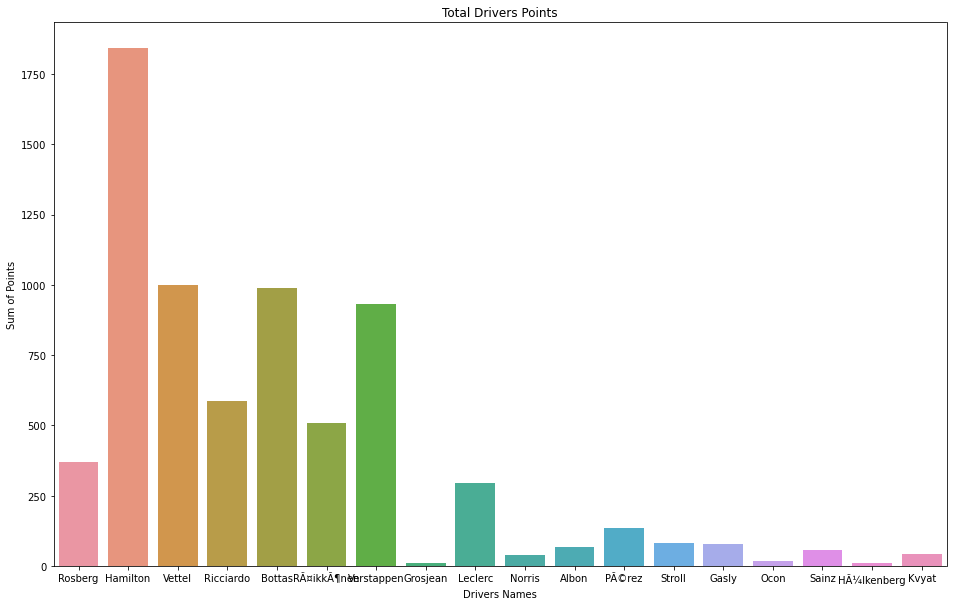

In [29]:
#Total points earned by driver since 2015. Cross driver last_nm in drivers table and points_earned 
#from results table
#New dataframe
df_viz1['sum_points'] = df_viz1.groupby('last_nm')['points_earned'].transform('sum')
fig = plt.gcf() #Set figure
fig.set_size_inches( 16, 10) #Figure size
sns.barplot(x = 'last_nm',y = 'sum_points',data = df_viz1) #Axis
plt.title ('Total Drivers Points')
plt.xlabel ('Drivers Names')
plt.ylabel ('Sum of Points')

# Show the plot
plt.show()



In [3]:
#Second visualization, take starting_position and finishing position into a dataframe
df_viz2=db_formula_one.loc[db_formula_one['season'] > 2015,['circuit_nm','starting_position','finishing_position']]

In [48]:
#Check the dataframe
df_viz2

,circuit_nm,starting_position,finishing_position
1179,Albert Park Circuit,2,1
1180,Albert Park Circuit,1,2
1181,Albert Park Circuit,3,3
1182,Albert Park Circuit,8,4
1183,Albert Park Circuit,6,5
...,...,...,...
22258,Circuit of the Americas,10,16
22259,Circuit of the Americas,18,17
22260,Circuit of the Americas,12,18
22261,Circuit of the Americas,19,19


Text(22.593749999999986, 0.5, 'Circuits Names')

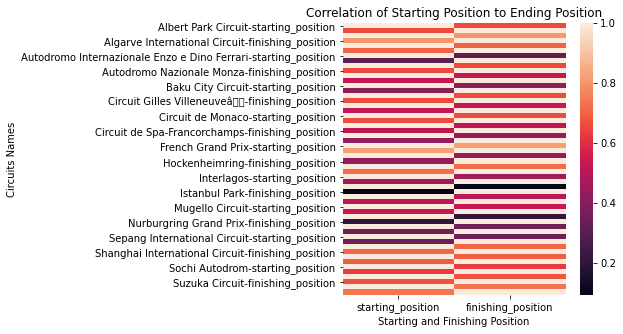

In [8]:
#Correlation by circuit name between starting position and finishing position to see if pole 
#position impacts finshing order. This across circuits and results.

df_viz2_5 = df_viz2.groupby('circuit_nm')[['starting_position','finishing_position']].corr() #New df with correlation
fig = plt.gcf()
fig.set_size_inches(5,5) #Size of figure
heat_map = sns.heatmap(df_viz2_5) #Heat map
plt.title ('Correlation of Starting Position to Ending Position') #Title
plt.xlabel ('Starting and Finishing Position') #Label for x axis
plt.ylabel ('Circuits Names') #Label for y axis

Notes: Heat map shows somewhat of a correlation between starting position and finishing position for some circuits. Circuits like Istanbul which is a street circuit starting position is less correlated to ending position. This might indicate circuit allows more passing and less speed compared to French Grand Prix circuit which is faster and giving less opportunity for passing.

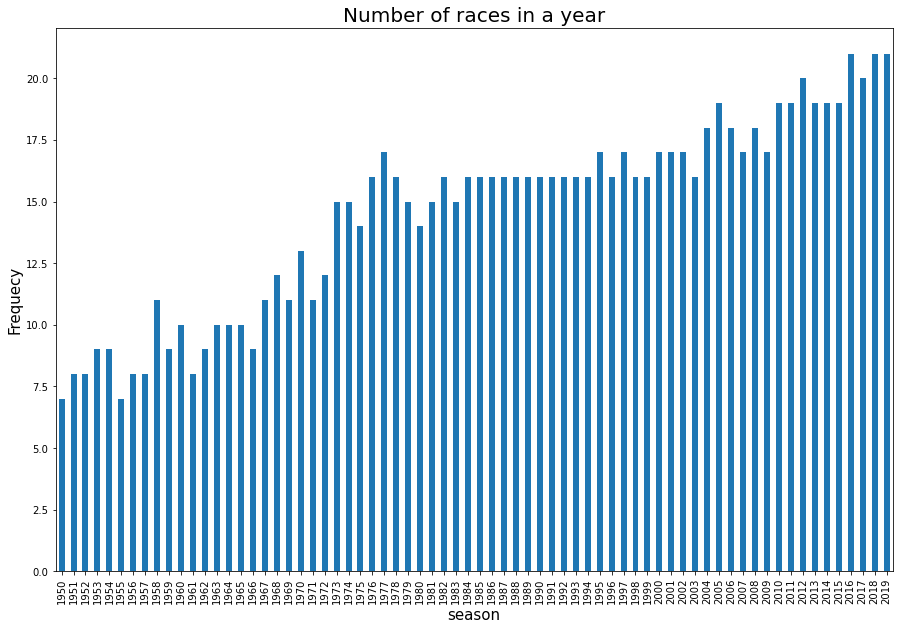

In [81]:
#Number of races per year since F1 started back in 1950
df_viz_3=df_f1_races.filter(['season'],axis=1) #From pervious milesont
#Plot the graph
plt.figure(figsize=(15,10)) #Figure size
plt.xlabel('Season',fontsize=15) #x axis label and font size
plt.ylabel('Frequecy', fontsize=15) #y axis label and font size
plt.title('Number of races in a year', fontsize=20) #Title
df_viz_3.groupby('season').size().plot.bar() #Group season to get count

Notes: The number of races increase from 1950 it peaked in 1977 before a decline. Remained stead from 1984 till 1995. Increase from there until getting to 19 to 20 race reason.

In [78]:
#Checking columns
db_formula_one.columns

Index(['index', 'circuit_id', 'circuit_ref', 'circuit_nm', 'circuit_type',
       'race_direction', 'circuit_city', 'circuit_country',
       'circuit_length_miles', 'circuit_length_km', 'race_nm', 'races_held',
       'season_utilize', 'index', 'season', 'round', 'circuit_ref',
       'driver_ref', 'constructor', 'starting_position', 'time_in_min',
       'status', 'points_earned', 'finishing_position', 'circuit_id', 'index',
       'driver_id', 'driver_ref', 'driver_code', 'first_nm', 'last_nm', 'dob',
       'driver_nationality'],
      dtype='object')

In [16]:
#Filter data into df_viz_4 for new visual. Country and circuit city to see which country has the most races.
df_viz_4 = db_formula_one.groupby(['circuit_country', 'circuit_city']).size().reset_index(name='Count')
#Print to view data
print (df_viz_4)


   circuit_country   circuit_city  Count
0        Argentina   Buenos Aires    443
1        Australia       Adelaide    300
2        Australia      Melbourne    518
3          Austria      Spielburg    799
4          Austria        Zeltweg     20
..             ...            ...    ...
67   United States  Moreno Valley     23
68   United States        Phoenix     90
69   United States        Sebring     19
70   United States       Speedway    498
71   United States   Watkins Glen    484

[72 rows x 3 columns]


In [21]:
#Do a grouping and sum on count
df_viz_4 = df_viz_4.groupby('circuit_country')['Count'].sum()
#df_viz_4 = df_viz_4.groupby(['circuit_country', 'circuit_city']).size().reset_index(name='Count')
print (df_viz_4)

#data = deliveries.groupby("type")["del_tip"].sum()

circuit_country
Argentina                1
Australia                2
Austria                  2
Azerbaijan               1
Bahrain                  1
Belgium                  3
Brazil                   2
Canada                   3
China                    1
France                   7
Germany                  3
Hungary                  1
India                    1
Italy                    4
Japan                    3
Malaysia                 1
Mexico                   1
Monaco                   1
Morocco                  1
Netherlands              1
Portugal                 4
Russia                   1
Singapore                1
South Africa             2
South Korea              1
Spain                    5
Sweden                   1
Switzerland              1
Turkey                   1
United Arab Emirates     1
United Kingdom           4
United States           10
Name: Count, dtype: int64


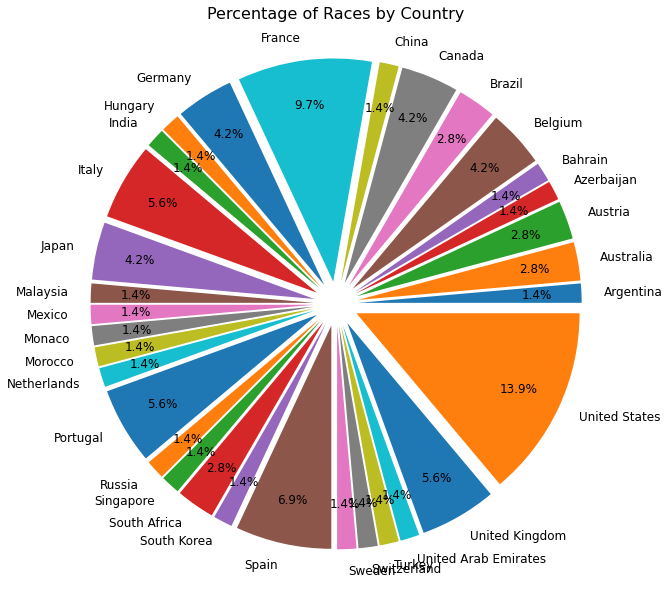

In [27]:
#Build pie chart showing where majority of the races are held
pie, ax = plt.subplots(figsize=[10,15]) #Pie chart size
plt.rcParams['font.size'] = 12 #Font Size
labels = df_viz_4.keys() #Use this as the labels
plt.pie(x=df_viz_4, autopct='%.1f%%',explode=[0.10]*32, labels=labels, pctdistance=0.8) #Set where labels will be
plt.title('Percentage of Races by Country', fontsize=16); #Title

Note: Considering Formula 1 started in Europe and is considered international. Majority of the fans are from Europe. The US has its own open wheel racing in Indy Car majority of the races are held in the US. Close to 14 percent of the races are in the US. France, Spain, Italy. Portugal and United Kingdom rounding out the top 6. 

In [4]:
#This goes across results and drivers table to get date of birth and season (race year) to find drivers age.
df_viz_5 = db_formula_one[['season','round','finishing_position','circuit_ref','last_nm','dob']]
df_viz_5.head()


,season,round,finishing_position,circuit_ref,circuit_ref,last_nm,dob
0,1953,1,1,galvez,galvez,Ascari,7/13/1918
1,1953,1,2,galvez,galvez,Villoresi,5/16/1909
2,1953,1,3,galvez,galvez,GonzÃ¡lez,10/5/1922
3,1953,1,4,galvez,galvez,Hawthorn,4/10/1929
4,1953,1,5,galvez,galvez,GÃ¡lvez,8/17/1913


In [5]:
#Bring in only position 1 finishes
df_viz_5=df_viz_5[df_viz_5['finishing_position']==1]
df_viz_5.shape

(1038, 7)

In [14]:
#Check the dataframe
df_viz_5.head()

,season,round,finishing_position,circuit_ref,circuit_ref,last_nm,dob
0,1953,1,1,galvez,galvez,Ascari,7/13/1918
17,1954,1,1,galvez,galvez,Fangio,6/24/1911
35,1955,1,1,galvez,galvez,Fangio,6/24/1911
65,1956,1,1,galvez,galvez,Fangio,6/24/1911
66,1956,1,1,galvez,galvez,Musso,7/28/1924


In [3]:
#Import date time
import datetime

Note: Resolved date issue related to different reporting based on how data was loaded to the API. This need to be resolved before continuing forward.

In [22]:
#Loop to find all the different date formats and make them the same.
def guess_date(string):
    for fmt in ['%Y/%m/%d', '%d/%m/%Y', '%m/%d/%Y']:
        try:
            return datetime.datetime.strptime(string, fmt).date()
        except ValueError:
            continue
    raise ValueError(string)

In [45]:
#Change the date to a single formation and put into a list
dt_of_birth=[]
for dt in df_viz_5['dob']:
    dt_of_birth.append(dt)
    

In [34]:
#Check the list
dt_of_birth

['7/13/1918',
 '6/24/1911',
 '6/24/1911',
 '6/24/1911',
 '7/28/1924',
 '6/24/1911',
 '9/17/1929',
 '8/30/1937',
 '6/11/1939',
 '12/12/1946',
 '6/18/1936',
 '12/12/1946',
 '1/29/1950',
 '2/28/1940',
 '11/21/1943',
 '11/2/1946',
 '8/17/1952',
 '9/17/1960',
 '9/17/1960',
 '4/9/1971',
 '1/3/1969',
 '12/6/1948',
 '2/24/1955',
 '8/27/1959',
 '2/24/1955',
 '7/13/1957',
 '8/17/1952',
 '3/21/1960',
 '8/27/1959',
 '3/21/1960',
 '8/8/1953',
 '9/17/1960',
 '9/17/1960',
 '3/27/1971',
 '9/28/1968',
 '11/10/1965',
 '1/3/1969',
 '1/3/1969',
 '1/3/1969',
 '3/27/1971',
 '1/3/1969',
 '1/14/1973',
 '7/29/1981',
 '10/17/1979',
 '1/7/1985',
 '1/19/1980',
 '1/19/1980',
 '7/3/1987',
 '1/19/1980',
 '10/17/1979',
 '6/27/1985',
 '1/7/1985',
 '6/27/1985',
 '7/3/1987',
 '7/3/1987',
 '8/28/1989',
 '6/27/1985',
 '6/27/1985',
 '1/7/1985',
 '8/28/1989',
 '9/30/1997',
 '9/30/1997',
 '8/28/1989',
 '1/7/1985',
 '12/21/1935',
 '6/27/1985',
 '7/1/1989',
 '1/7/1985',
 '8/28/1989',
 '1/3/1969',
 '7/29/1981',
 '7/29/1981',
 '

In [35]:
#Add the list to the dataframe
df_viz_5['date_of_birth'] = dt_of_birth 

In [36]:
#Check the data frame
df_viz_5.head()

,season,round,finishing_position,circuit_ref,circuit_ref,last_nm,dob,date_of_birth
0,1953,1,1,galvez,galvez,Ascari,7/13/1918,7/13/1918
17,1954,1,1,galvez,galvez,Fangio,6/24/1911,6/24/1911
35,1955,1,1,galvez,galvez,Fangio,6/24/1911,6/24/1911
65,1956,1,1,galvez,galvez,Fangio,6/24/1911,6/24/1911
66,1956,1,1,galvez,galvez,Musso,7/28/1924,7/28/1924


In [39]:
#Check the dataframe data type.
df_viz_5.dtypes

season                 int64
round                  int64
finishing_position     int64
circuit_ref           object
circuit_ref           object
last_nm               object
dob                   object
date_of_birth         object
dtype: object

In [44]:
#Do the conversation from string to datetime64
df_viz_5['date_of_birth']  = pd.to_datetime(df_viz_5['date_of_birth'])

In [46]:
#Confirm changes took
df_viz_5.dtypes

season                         int64
round                          int64
finishing_position             int64
circuit_ref                   object
circuit_ref                   object
last_nm                       object
dob                           object
date_of_birth         datetime64[ns]
dtype: object

In [49]:
#Find split the drivers year of birth
df_viz_5['driver_birth_yr'] = pd.DatetimeIndex(df_viz_5['date_of_birth']).year


In [52]:
#Do the calculation for driver age
df_viz_5['driver_age'] = df_viz_5['season'] - df_viz_5['driver_birth_yr'] 

In [53]:
#Check it worked
df_viz_5.head()

,season,round,finishing_position,circuit_ref,circuit_ref,last_nm,dob,date_of_birth,driver_birth_yr,driver_age
0,1953,1,1,galvez,galvez,Ascari,7/13/1918,1918-07-13,1918,35
17,1954,1,1,galvez,galvez,Fangio,6/24/1911,1911-06-24,1911,43
35,1955,1,1,galvez,galvez,Fangio,6/24/1911,1911-06-24,1911,44
65,1956,1,1,galvez,galvez,Fangio,6/24/1911,1911-06-24,1911,45
66,1956,1,1,galvez,galvez,Musso,7/28/1924,1924-07-28,1924,32


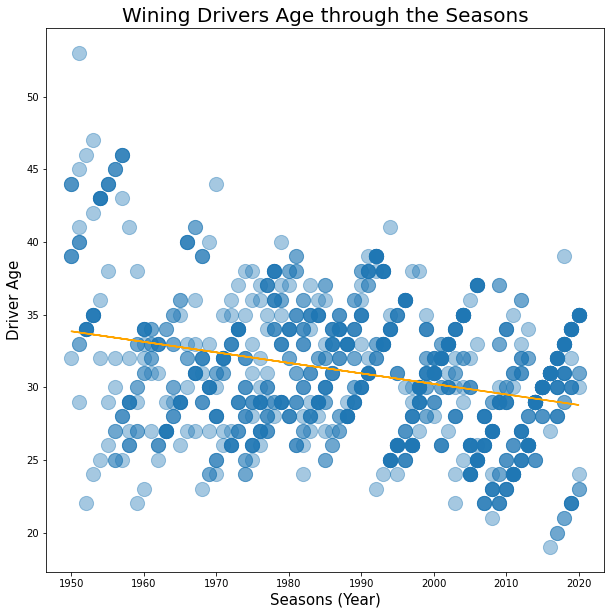

In [75]:
#Plot my scatter plot
plt.figure(figsize=(10,10)) #Figure size
plt.xlabel('Seasons (Year)',fontsize=15) #x axis label and font size
plt.ylabel('Driver Age', fontsize=15) #y axis label and font size
plt.title('Wining Driver''s Age through the Seasons', fontsize=20) #Title
plt.scatter(df_viz_5['season'],df_viz_5['driver_age'], s=200, marker='o',alpha=0.4)
m, b = np.polyfit(df_viz_5['season'],df_viz_5['driver_age'], 1)
plt.plot(df_viz_5['season'], m*df_viz_5['season']+b, color='orange')
plt.show()

This shows how driver younger and younger driver are needed to complete in F1. New drivers are being brought into the sport at a very young age. Some even before they are legal to drive on city streets of their own home towns.